In [ ]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
from google.colab import drive
drive.mount('/content/drive')
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline 
sns.set(color_codes=True)

# Importing data
df = pd.read_csv("drive/My Drive/Colaboratory/data.csv")

# Drop unused ddata
df = df.drop(['Make','Model','Year','Engine Fuel Type','Engine HP','Engine Cylinders','Transmission Type','Driven_Wheels','Number of Doors','Market Category','Vehicle Size','Vehicle Style','Popularity','MSRP'], axis=1)

# Drop duplicate data
df = df.drop_duplicates()

# Drop null value
df = df.dropna() 

# Rename columns
df = df.rename(columns={"highway MPG": "MPGH", "city mpg": "MPGC"})

# Clean outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

df.head(5)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,MPGH,MPGC
0,26,19
1,28,19
2,28,20
3,28,18
6,26,17


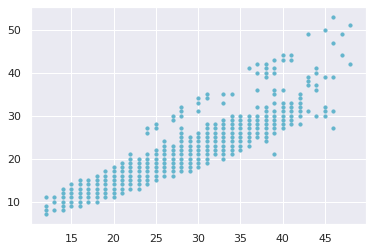

In [ ]:
plt.scatter(df.MPGH, df.MPGC, s =10, c = "c", marker = "o", alpha = 1)
plt.show()

In [ ]:
df_x = df.iloc[:, 0:2]
df_x.head()

,MPGH,MPGC
0,26,19
1,28,19
2,28,20
3,28,18
6,26,17


In [ ]:
x_array = np.array(df_x)
print(x_array)

[[26 19]
 [28 19]
 [28 20]
 [28 18]
 [26 17]
 [27 18]
 [25 18]
 [24 17]
 [20 16]
 [21 16]
 [22 16]
 [22 17]
 [35 26]
 [26 18]
 [25 17]
 [35 23]
 [34 23]
 [31 20]
 [34 22]
 [30 20]
 [31 21]
 [32 21]
 [35 24]
 [33 24]
 [33 23]
 [22 15]
 [23 15]
 [36 23]
 [29 18]
 [36 26]
 [29 21]
 [35 25]
 [25 20]
 [23 18]
 [35 29]
 [34 28]
 [33 22]
 [33 25]
 [45 32]
 [43 31]
 [36 24]
 [40 30]
 [42 32]
 [19 15]
 [20 15]
 [18 15]
 [21 14]
 [30 23]
 [29 23]
 [17 14]
 [21 15]
 [22 18]
 [23 17]
 [18 14]
 [31 19]
 [30 19]
 [24 16]
 [25 16]
 [32 24]
 [23 19]
 [15 10]
 [37 25]
 [39 28]
 [41 30]
 [41 29]
 [37 27]
 [40 29]
 [37 28]
 [34 25]
 [36 27]
 [29 20]
 [33 21]
 [32 22]
 [16 12]
 [17 13]
 [14  9]
 [15  9]
 [34 24]
 [21 17]
 [27 19]
 [24 15]
 [38 26]
 [37 26]
 [15 11]
 [16 13]
 [19 14]
 [40 31]
 [33 28]
 [33 27]
 [30 22]
 [30 21]
 [31 22]
 [12  8]
 [23 16]
 [16  9]
 [16 10]
 [28 22]
 [28 21]
 [14 10]
 [27 17]
 [28 17]
 [25 19]
 [40 28]
 [20 13]
 [29 19]
 [31 23]
 [26 20]
 [20 17]
 [24 18]
 [19 12]
 [18 10]
 

In [ ]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.38888889, 0.26086957],
       [0.44444444, 0.26086957],
       [0.44444444, 0.2826087 ],
       [0.44444444, 0.23913043],
       [0.38888889, 0.2173913 ],
       [0.41666667, 0.23913043],
       [0.36111111, 0.23913043],
       [0.33333333, 0.2173913 ],
       [0.22222222, 0.19565217],
       [0.25      , 0.19565217],
       [0.27777778, 0.19565217],
       [0.27777778, 0.2173913 ],
       [0.63888889, 0.41304348],
       [0.38888889, 0.23913043],
       [0.36111111, 0.2173913 ],
       [0.63888889, 0.34782609],
       [0.61111111, 0.34782609],
       [0.52777778, 0.2826087 ],
       [0.61111111, 0.32608696],
       [0.5       , 0.2826087 ],
       [0.52777778, 0.30434783],
       [0.55555556, 0.30434783],
       [0.63888889, 0.36956522],
       [0.58333333, 0.36956522],
       [0.58333333, 0.34782609],
       [0.27777778, 0.17391304],
       [0.30555556, 0.17391304],
       [0.66666667, 0.34782609],
       [0.47222222, 0.23913043],
       [0.66666667, 0.41304348],
       [0.

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state=123)
kmeans.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [ ]:
print(kmeans.cluster_centers_)

[[0.52620968 0.37447405]
 [0.20242317 0.15471785]
 [0.8021262  0.61460011]]


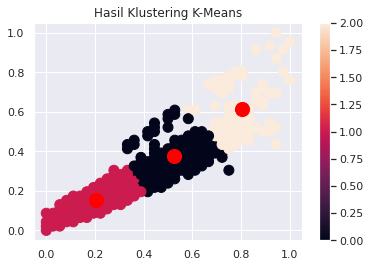

In [ ]:
df["kluster"] = kmeans.labels_
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = df.kluster, marker = "o", alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker="o");
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()